<center><h1>Homework 4</h1>
<br/>

<u>Name:  Vaikunth Bhandare </u><br/>
SID:200393449
email:vkb806@uregina.ca</center>

#Part A: Determine Model
<p align="justify"> 
  There are multiple algorithms that can be applied to a dataset when it comes to building a learning model, namely logistic regression, linear regression and random forester. But chosing the right algorithm for a particular dataset is a crucial task and rather a gamechanging one as well as chosing a bad algorithm may cause results that would be much better if taken into consideration the right parameters with their behaviour.<br/>
  For the current employee attrition model, linear regression or logistic regression cannot be a prefferable choice as linear regression tends towards data sets that consist of millions of items and require tedious time to process, and are quicker to process them in a relatively lesser time like in case of finance sector, or medical sector which includes an abundance of data to be compared and maintained in a periodic fashion.<br/>
  In other context, the random forester is used in smaller dataset with more classification and the algorithm works on a structural base like a tree. Most of the data that is present in a dataset isn't necessary and random forest particularly focuses on the crucial data that is deterministic for making a stronger model.
  In othr sense, the less predictive values are combined in such a way that the conjunctive result allows the model to achieve a better prediction.
   

In [0]:
from google.colab import drive
drive.mount('/content/drive')


from google.colab import files
new_upload=files.upload()

import pandas as pd
import io
input_csvFile = pd.read_csv(io.BytesIO(new_upload['Employee_dataset.csv']))

It is always a good practice to make a duplicate of the dataset so that the original dataset remains intact incase of dropping or altering any features of dataset in order to fit the model's requirements.

In [0]:
data_set=input_csvFile.copy()
data_set.columns.to_series().groupby(data_set.dtypes).groups
#describe columns by group

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

#Part B: Model Algorithm
<p align="justify">To use the random forester, we have to first look at all the preceeding steps that are to be considered before applying the actual model.
  Firstly to use the dataset into the model, it needs to beconverted into its numerical format. In order to achievve this, we have created a copy of the selective dataframes into numerical_ds. Then, the uncatagorised_ds is taken into consideration to be used as areference to create a more cleaner dataset i.e the catagorical_ds by removing all the unwanted correlated values present to get a cleaner dataset that will be used to create the final dataset. But before creating the final dataset,, we have to convert the attrition values into their numerical format and merge them using dummy function in pandas.
  To form the final dataset that will be used to create the model, we will combine the numerical dataset and the finely tuned catagorical dataset by using the concatenation function in pandas dataframe.
  Also now the Attrition data value can be directly compared with other values for the model to use in its predictive calculations.

In [0]:
numerical_ds = data_set[['Age','DailyRate','DistanceFromHome', 'Education','EmployeeNumber', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 
                        'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 
                       'RelationshipSatisfaction', 'StockOptionLevel',
                       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                       'YearsWithCurrManager']].copy()
numerical_ds.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [0]:
#Create an uncatogorical dataset
uncatagorical_ds = numerical_ds[['Age','DailyRate','DistanceFromHome', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','JobSatisfaction', 
                       'RelationshipSatisfaction', 'StockOptionLevel',
                        'TrainingTimesLastYear']].copy()

uncatagorical_ds.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear
0,41,1102,1,2,94,3,2,4,1,0,0
1,49,279,8,3,61,2,2,2,4,1,3
2,37,1373,2,4,92,2,1,3,2,0,3
3,33,1392,3,4,56,3,1,3,3,0,3
4,27,591,2,1,40,3,1,2,4,1,3


In [0]:
#Copy categorical data by ommiting correlated values in uncatagorical dataset 
catagorised_ds = data_set[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole','MaritalStatus',
                       'Over18', 'OverTime']].copy()
catagorised_ds.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [0]:
#Classify attrition for 0 and 1
classification_Val = {'Yes':1, 'No':0}
catagorised_ds['Attrition'] = catagorised_ds["Attrition"].apply(lambda x: classification_Val[x])
catagorised_ds.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [0]:
#Convert to numerical using pandas dummy
catagorised_ds = pd.get_dummies(catagorised_ds)
catagorised_ds.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [0]:
#concatenate both datasets
final_ds= pd.concat([numerical_ds, catagorised_ds], axis=1)
final_ds.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


#Part C: Model Building & Visualisations
<p align="justify"> To apply the random forester, we use the scikit learn library as it has an abundance of predefined libraries such as model selection, ensemble, metrics, preprocessing,  classification, clustering, etc that help develop a cleaner and short code without including much of the fuzzy logic(T. Mahboob, 2016.)
  The modelling comprises of two major components one is train the data and the second part is to test it with the original dataset.
  The first snippet below consists of two datasets, one which has only the attrition data and the other in which the attrition column is dropped, which is done in order to compare the two datasets with the key aspect of the model. The training model will then compare the splitted data and train with the acquired test results using the scikit library's model selection method.<br/>
  The learning model will then enforce the RandomForest Classifier algorithm using the scikit's predefined ensemble method and the model will be trained on its x and y values for a comparative analysis.
  Once the model has been trained, its time to now test it to the original dataset to acquire its accuracy and retrieve the most influential features affecting employee attrition. 

In [0]:
from sklearn.model_selection import train_test_split


main_Val = final_ds['Attrition']
dropped_ds = final_ds.drop('Attrition', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(dropped_ds, main_Val, test_size=0.4, random_state=10)

In [0]:
from sklearn.ensemble import RandomForestClassifier

learning_model = RandomForestClassifier()
learning_model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Fig 1: Top Features affecting Employee Attrition


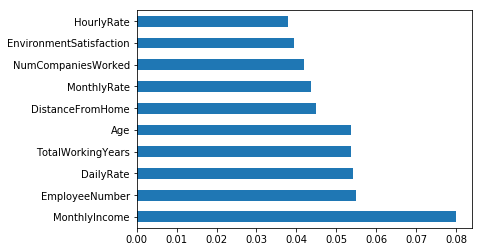

In [0]:
top_features = pd.Series(learning_model.feature_importances_, index=dropped_ds.columns)
top_features = top_features.nlargest(10)
top_features.plot(kind='barh')

print('Fig 1: Top Features affecting Employee Attrition')

In [0]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
predict_results = learning_model.predict(X_test)

val_c = np.round(accuracy_score(y_test, predict_results)*100,3)

print("The accuracy of current Random Forester model is:",val_c,"%")

The accuracy of current Random Forester model is: 84.184 %


#Part D: Discussion
With the predicted accuracy of the model being 83.5%, it would be safe to say that model will accurately predict 8 out of 10 attrition values thrown to the model with keeping in mind the leaned predictivity towards no attrition retained from the confusion matrix.
The confusion matrix shown below in fig 2, is an quantitative analysis of the comparison between the actual and the predicted attrition value as dummy values taken to test the model as onto par with the existing dataset. The results clearly display that the model is leaned towards a high attrition results of employees with 0 attrition or no attrition. That means using this model, the management can use a predictive analysis onto which factors can be determined as crucial factors for retaining an employee by considering the visible job features that affect retention of an emploee over the run of their career in the particular organization.

Text(0.5, 257.44, 'Predicted Attrition Values')

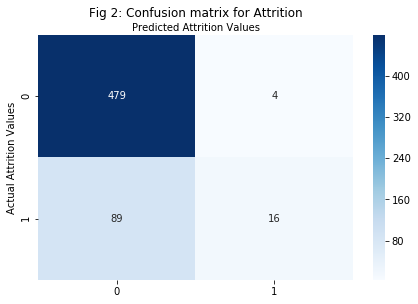

In [0]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

confusionMatrix = metrics.confusion_matrix(y_test, learning_model.predict(X_test))
valClass=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(valClass))
plt.xticks(tick_marks, valClass)
plt.yticks(tick_marks, valClass)

sns.heatmap(pd.DataFrame(confusionMatrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Fig 2: Confusion matrix for Attrition', y=1.1)
plt.ylabel('Actual Attrition Values')
plt.xlabel('Predicted Attrition Values')

#Part E: Summary
As per the knowledge development throughout the notebook's development, it is imminent that data management is a crucial part when it comes to aiding predictive analysis for any tasks and in this situation as well, the kaggle dataset helped us to identify and train a model to pinpoint on how and what might be the causes for an employee attrition. The random forest algorithm which is an integral part of the notebook's analysis also provided promising results of predicting the attrition of 83.5% as compared to the original dataset which might be safe to assume as a satisfactorial score. Also the top 10 main factors affecting the employee attrition as shown above demonstrate that Monthly Income is the peak factor that affects the employee attrition followed by their age, strength of the organization, their total service years and so on.
With careful observation on a periodic basis by the management staff, keeping these factors on a satisfactorial basis could help avoid employee attrition.

###References



Pavan Subhash(2017).  [online] kaggle. Available at: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset [Accessed 06 Aug. 2019].

T. Mahboob, S. Irfan and A. Karamat, "A machine learning approach for student assessment in E-learning using Quinlan's C4.5, Naive Bayes and Random Forest algorithms," 2016 19th International Multi-Topic Conference (INMIC), Islamabad, 2016, pp. 1-8.
doi: 10.1109/INMIC.2016.7840094